In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
df = pd.DataFrame({'x':[2, 0.5, 1], 'y':[2, 1.5, 1]})

In [ ]:
df

,x,y
0,2.0,2.0
1,0.5,1.5
2,1.0,1.0


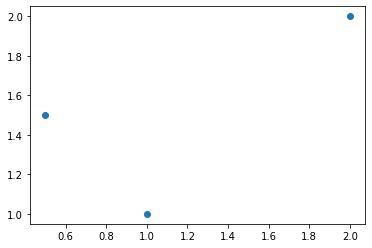

In [ ]:
plt.scatter(df['x'], df['y'])

In [ ]:
m, b = 1, 1

In [ ]:
df['y_pred'] = df['x'] * m + b

In [ ]:
df

,x,y,y_pred,m_change,b_change,err_abs,x0
0,2.0,2.0,3.0,2.0,1.0,0.006667,1
1,0.5,1.5,1.5,0.5,1.0,0.354167,1
2,1.0,1.0,2.0,-1.0,-1.0,0.428333,1


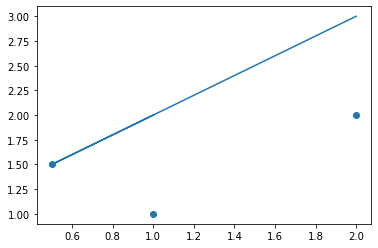

In [ ]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])

In [ ]:
df['err_abs'] = np.abs(df['y']-df['y_pred'])

In [ ]:
df['err_abs'].mean()

0.6666666666666666

In [ ]:
df['m_change'] = df['x'] * (df['y']-df['y_pred'])/np.abs(df['y']-df['y_pred'])

In [ ]:
df

,x,y,y_pred,err_abs,m_change
0,2.0,2.0,3.0,1.0,-2.0
1,0.5,1.5,1.5,0.0,NaN
2,1.0,1.0,2.0,1.0,-1.0


In [ ]:
df['m_change'] = df['x'] * np.sign(df['y']-df['y_pred'])

In [ ]:
df

,x,y,y_pred,err_abs,m_change
0,2.0,2.0,3.0,1.0,-2.0
1,0.5,1.5,1.5,0.0,0.0
2,1.0,1.0,2.0,1.0,-1.0


In [ ]:
df['m_change'].mean()

-1.0

In [ ]:
df['b_change'] = np.sign(df['y']-df['y_pred'])

In [ ]:
df['b_change'].mean()

-0.6666666666666666

In [ ]:
nu = 0.1

In [ ]:
m , b

(1, 1)

In [ ]:
m = m + nu * df['m_change'].mean()
b = b + nu * df['b_change'].mean()

In [ ]:
m , b

(0.9, 0.9333333333333333)

In [ ]:
df['y_pred'] = df['x'] * m + b

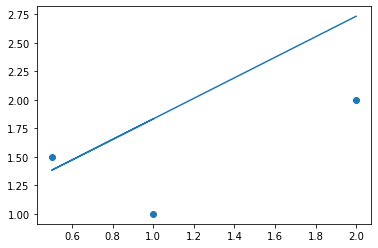

In [ ]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred'])

In [ ]:
df['err_abs'] = np.abs(df['y']-df['y_pred'])

In [ ]:
df['err_abs'].mean()

0.6666666666666666

In [ ]:
df = df[['x', 'y']].copy()
m, b = 1, 1
nu = 0.01
n = 100
df['y_pred'] = df['x'] * m + b
for i in range(n):
  df['m_change'] = df['x'] * np.sign(df['y']-df['y_pred'])
  df['b_change'] = np.sign(df['y']-df['y_pred'])
  m = m + nu * df['m_change'].mean()
  b = b + nu * df['b_change'].mean()
  df['y_pred'] = df['x'] * m + b
  df['err_abs'] = np.abs(df['y']-df['y_pred'])
  print(df['err_abs'].mean())

0.6561111111111111
0.6480555555555555
0.64
0.6319444444444445
0.623888888888889
0.6158333333333336
0.607777777777778
0.5997222222222225
0.5916666666666669
0.5836111111111113
0.5755555555555559
0.5675000000000004
0.5594444444444449
0.5513888888888894
0.5433333333333338
0.5352777777777783
0.5272222222222228
0.5191666666666671
0.5111111111111117
0.5030555555555563
0.4950000000000007
0.48694444444444523
0.47888888888888964
0.47083333333333416
0.4627777777777786
0.45472222222222297
0.4466666666666676
0.4386111111111121
0.4305555555555565
0.42250000000000104
0.4144444444444455
0.40638888888889
0.3983333333333345
0.39027777777777883
0.3822222222222234
0.3741666666666679
0.3661111111111124
0.3580555555555569
0.35000000000000137
0.3419444444444459
0.3338888888888903
0.3258333333333347
0.31777777777777927
0.3097222222222238
0.30166666666666825
0.29361111111111277
0.2855555555555572
0.2775000000000017
0.26944444444444615
0.26583333333333203
0.26666666666666844
0.2674999999999987
0.263888888888890

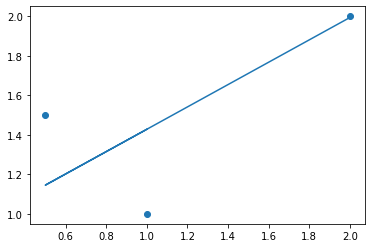

In [ ]:
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], df['y_pred']);

In [ ]:
df['x0']=1
df

,x,y,y_pred,m_change,b_change,err_abs,x0
0,2.0,2.0,1.993333,2.0,1.0,0.006667,1
1,0.5,1.5,1.145833,0.5,1.0,0.354167,1
2,1.0,1.0,1.428333,-1.0,-1.0,0.428333,1


In [ ]:
XT = df[['x', 'x0']].T
XTX = np.dot(XT, df[['x', 'x0']])

inv = np.linalg.inv(XTX)
theta = np.dot(np.dot(inv, XT), df['y'])
print(theta)

[0.42857143 1.        ]


In [ ]:
df = df[['x', 'y']].copy()
m, b = 1, 1
nu = 0.01
n = 100
df['y_pred'] = df['x'] * m + b
for i in range(n):
  df['m_change'] = 2 * df['x'] * (df['y']-df['y_pred'])
  df['b_change'] =2 * (df['y']-df['y_pred'])
  m = m + nu * df['m_change'].mean()
  b = b + nu * df['b_change'].mean()
  df['y_pred'] = df['x'] * m + b
  df['err_abs'] = np.abs(df['y']-df['y_pred'])
  print(df['err_abs'].mean())

0.6455555555555557
0.6255314814814813
0.6065379413580246
0.5885213706738682
0.5714309906605366
0.5552186634087964
0.5398387545203177
0.5252480029026936
0.5114053973362984
0.4982720594607888
0.4858111328473651
0.473987677840282
0.4627685718675531
0.45212241493640093
0.44201944004380117
0.43243142824648945
0.42333162814809705
0.4146946795736856
0.4064965412138954
0.3987144220322563
0.3913267162399372
0.3843129416523979
0.3776536812520545
0.37133052779021347
0.3653260312702089
0.3596236491618887
0.3542076992054029
0.34906331466961715
0.3441764019374971
0.3395336002974357
0.33512224382579503
0.3309303252519002
0.32694646170238184
0.3231598622271219
0.3195602970141438
0.31613806820560714
0.3128839822316341
0.3097893235830272
0.3068458299480428
0.304045668642277
0.30138141426441045
0.2988460275140565
0.29643283511127144
0.29413551076043376
0.2919480571041711
0.28986478861584764
0.2878803153817953
0.2859895277270163
0.2841875816404871
0.28246988495847797
0.28083208426646494
0.2792700524822598

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(df[['x']], df['y'])
print(model.coef_, model.intercept_)

[0.42857143] 1.0


[0.62610384] [0.52670238]


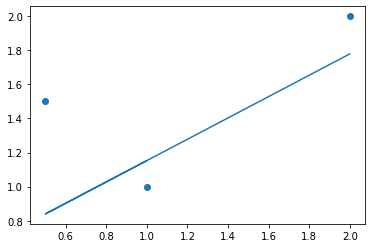

In [ ]:
from sklearn.linear_model import SGDRegressor
model2 = SGDRegressor()
model2.fit(df[['x']], df['y'])
print(model2.coef_, model2.intercept_)
plt.scatter(df['x'], df['y'])
plt.plot(df['x'], model2.coef_[0]*df['x'] + model2.intercept_[0]);

In [ ]:
from sympy import *
x, y, m, b = Symbol('x', real=True), Symbol('y', real=True), Symbol('m', real=True), Symbol('b', real=True)
diff(Abs(y - x*m - b), m)

TypeError: ignored